In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
import itertools, math, pickle

In [2]:
## Example 1 - Linear Regression (Binary Classification) 
## Linear Regression - Single Variable to Predict home price
## Binary Classification
# price = m * area + b 
df = pd.read_excel('dataset/homeprices.xlsx')
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


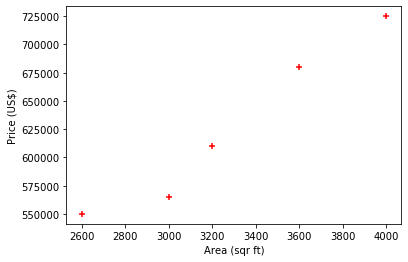

In [3]:
%matplotlib inline
plt.xlabel('Area (sqr ft)')
plt.ylabel('Price (US$)')
plt.scatter(df.area, df.price, color = 'red', marker = '+')

In [4]:
## Linear Regression Model - Single Variable
reg = linear_model.LinearRegression()
## fit() - training linear regression model using available data points.
reg.fit(df[['area']], df.price)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [5]:
## y = mx+b // m is slope(or)coefficient and b is intercept
## price = coefficient * area + intercept

print(f" Coefficient : {reg.coef_}")
print(f" Intercept : {reg.intercept_}")

new_area = 3300
print(f" Prediction for Area 3300 : {reg.predict([[new_area]])}")
y = reg.coef_ * new_area + reg.intercept_
print(f" Price for Area 3300 : {y}")

new_area = 5000
print(f" Prediction for Area 5000 : {reg.predict([[new_area]])}")
y = reg.coef_ * new_area + reg.intercept_
print(f" Price for Area 5000 : {y}")

 Coefficient : [135.78767123]
 Intercept : 180616.43835616432
 Prediction for Area 3300 : [628715.75342466]
 Price for Area 3300 : [628715.75342466]
 Prediction for Area 5000 : [859554.79452055]
 Price for Area 5000 : [859554.79452055]


In [6]:
## Another example in same linear regression single variable with 
# list of input areas now.
df2 = pd.read_excel('dataset/homeprices.xlsx', sheet_name = 'input_data')
df2.head()

,area
0,1000
1,1500
2,2300
3,3540
4,4120


In [7]:
# Method - 1
input_area = list(itertools.chain(*df2.values.tolist()))
for area in input_area:
    pred_result = int(reg.predict([[area]])[0])
    print(f"Area: {area} => Predicted Home Price: {pred_result}")

Area: 1000 => Predicted Home Price: 316404
Area: 1500 => Predicted Home Price: 384297
Area: 2300 => Predicted Home Price: 492928
Area: 3540 => Predicted Home Price: 661304
Area: 4120 => Predicted Home Price: 740061
Area: 4560 => Predicted Home Price: 799808
Area: 5490 => Predicted Home Price: 926090
Area: 3460 => Predicted Home Price: 650441
Area: 4750 => Predicted Home Price: 825607
Area: 2300 => Predicted Home Price: 492928
Area: 9000 => Predicted Home Price: 1402705
Area: 8600 => Predicted Home Price: 1348390
Area: 7100 => Predicted Home Price: 1144708


In [8]:
## Method - 2
new_prices = reg.predict(df2)
df2['price'] = new_prices
df2

,area,price
0,1000,3.164041e+05
1,1500,3.842979e+05
2,2300,4.929281e+05
3,3540,6.613048e+05
4,4120,7.400616e+05
5,4560,7.998082e+05
6,5490,9.260908e+05
7,3460,6.504418e+05
8,4750,8.256079e+05
9,2300,4.929281e+05


In [9]:
# Save prediciton home price (price column added) in same excel.
df2.to_excel('dataset/homeprice_predicton.xlsx', index = False)

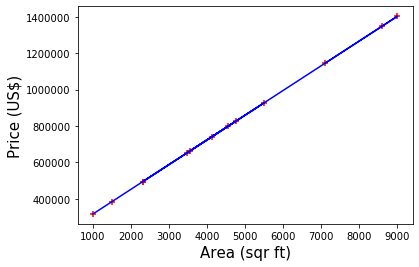

In [10]:
%matplotlib inline
plt.xlabel('Area (sqr ft)', fontsize=15)
plt.ylabel('Price (US$)', fontsize=15)
plt.scatter(df2.area, df2.price, color = 'red', marker = '+')
plt.plot(df2.area, reg.predict( df2[['area']] ), color = 'blue')

In [11]:
## Another example in same linear regression single variable.
df3 = pd.read_excel('dataset/canada_per_capita_income.xlsx')
df3.tail()

,year,per_capita_income_usd
42,2012,42665.25597
43,2013,42676.46837
44,2014,41039.89360
45,2015,35175.18898
46,2016,34229.19363


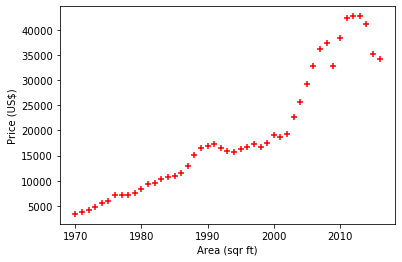

In [12]:
%matplotlib inline
plt.xlabel('Area (sqr ft)')
plt.ylabel('Price (US$)')
plt.scatter(df3.year, df3.per_capita_income_usd, color = 'red', marker = '+')

In [13]:
reg3 = linear_model.LinearRegression()
reg3.fit(df3[['year']], df3.per_capita_income_usd)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [14]:
input_years = [2017, 2018, 2019, 2020]
for year in input_years:
    pred_result = int(reg.predict([[ year ]])[0])
    print(f"Year: {year} ==> Predicted Income USD : $ {pred_result}")

Year: 2017 ==> Predicted Income USD : $ 454500
Year: 2018 ==> Predicted Income USD : $ 454635
Year: 2019 ==> Predicted Income USD : $ 454771
Year: 2020 ==> Predicted Income USD : $ 454907


In [15]:
##########################################################
## Linear Regression with Multiple Variable => Multivariate Regression
df4 = pd.read_excel('dataset/homeprices2.xlsx')
df4

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000


In [16]:
median_bedrooms = math.floor(df4.bedrooms.median())
print(f"Average Bedrooms: {median_bedrooms} ")
df4.bedrooms = df4.bedrooms.fillna(median_bedrooms)
df4

Average Bedrooms: 3 


,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,3.0,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000


In [17]:
reg = linear_model.LinearRegression()
reg.fit(df4[['area', 'bedrooms', 'age']], df4.price)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [18]:
## y = mx+b // m is slope(or)coefficient and b is intercept
## price = coefficient * area + intercept

print(f" Coefficient : {reg.coef_}")
print(f" Intercept : {reg.intercept_}")

new_area, new_bedrooms, new_age = 3000, 3, 40
pred_result = int(reg.predict([[new_area, new_bedrooms, new_age]])[0])
print(f" Prediction for Input1 : {pred_result}")
y = reg.coef_[0] * new_area + \
    reg.coef_[1] * new_bedrooms + \
    reg.coef_[2] * new_age + reg.intercept_
print(f" Price for Input1 : {int(y)}")

new_area, new_bedrooms, new_age = 2500, 4, 5
pred_result = int(reg.predict([[new_area, new_bedrooms, new_age]])[0])
print(f" Prediction for Input2 : {pred_result}")
y = reg.coef_[0] * new_area + \
    reg.coef_[1] * new_bedrooms + \
    reg.coef_[2] * new_age + reg.intercept_
print(f" Price for Input2 : {int(y)}")

 Coefficient : [   137.25 -26025.    -6825.  ]
 Intercept : 383724.99999999994
 Prediction for Input1 : 444400
 Price for Input1 : 444400
 Prediction for Input2 : 588625
 Price for Input2 : 588625


In [19]:
## Another example in same linear regression single variable.
df5 = pd.read_excel('dataset/hiring.xlsx')
df5

,experience,test_score,interview_score,salary_usd
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [20]:
# Assume blank experience as zero
df5.experience = df5.experience.fillna('zero')

# Python module to convert number words to numeric digits.
from word2number import w2n
df5.experience = df5.experience.apply(w2n.word_to_num)

# Take average of test score to fill blank in test score column
median_test_score = math.floor(df5.test_score.median())
print(f"Average Test Score: {median_test_score} ")
df5.test_score = df5.test_score.fillna(median_test_score)
df5

Average Test Score: 8 


,experience,test_score,interview_score,salary_usd
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,8.0,7,72000
7,11,7.0,8,80000


In [21]:
reg = linear_model.LinearRegression()
reg.fit(df5[['experience', 'test_score', 'interview_score']], df5.salary_usd)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [22]:
## y = mx+b // m is slope(or)coefficient and b is intercept
## price = coefficient * area + intercept

print(f" Coefficient : {reg.coef_}")
print(f" Intercept : {reg.intercept_}")

new_exp, new_test_score, new_interview_score = 2, 9, 6
pred_result = int(reg.predict([[new_exp, new_test_score, new_interview_score]])[0])
print(f" Prediction for Input1 : {pred_result}")
y = reg.coef_[0] * new_exp + \
    reg.coef_[1] * new_test_score + \
    reg.coef_[2] * new_interview_score + reg.intercept_
print(f" Price for Input1 : {int(y)}")

new_exp, new_test_score, new_interview_score = 12, 10, 10
pred_result = int(reg.predict([[new_exp, new_test_score, new_interview_score]])[0])
print(f" Prediction for Input2 : {pred_result}")
y = reg.coef_[0] * new_exp + \
    reg.coef_[1] * new_test_score + \
    reg.coef_[2] * new_interview_score + reg.intercept_
print(f" Price for Input2 : {int(y)}")

 Coefficient : [2812.95487627 1845.70596798 2205.24017467]
 Intercept : 17737.263464337695
 Prediction for Input1 : 53205
 Price for Input1 : 53205
 Prediction for Input2 : 92002
 Price for Input2 : 92002
